<a href="https://colab.research.google.com/github/rvijay9/LLM/blob/main/HF_Transformers_Table_QA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Open and Closed Domain - Question and Answer**

A natural extension of IR systems is a QA system, which not only takes ranked documents but also returns a selected part of the document – much like nowadays Google.

There are the following types of question answering systems (Question Answering for short):

    closed domain
    open domain

and each of these types can be divided into open and closed book QA systems.

1. What is a closed domain answer?

Closed domain question answering (CDQA) is a broad name for the task of answering questions only from one domain, for example legal, medical, engineering, etc.

2. What is an open-domain answer?

Open-Domain Question Answering (OPQA) is the task of answering a question from any domain. In this way, a trained model can be asked a question about anything.

In OPQA systems are based on Information Retrieval techniques, first for locating a relevant document to a query and then follow the NLP techniques to extract relevant parts of the document.

Open Domain Question Answering (OPQA) is provided asked a question and it should formulate an answer, for example, “What did Albert Einstein win the Nobel Prize for?”, the answer is “The law of the photoelectric effect” – where the true answer is clearly objective.

Following [1] there are three classes of questions that a trained OPQA system should be able to answer in increasing order of difficulty:

    the most basic behavior is to be able to reliably recall the answer to a question that the model has seen at the training time
    a model should be able to answer novel questions at test time and choose an answer from the set of answers it has seen during training
    a strong system should be able to answer novel questions which have answers which are not contained in the training data


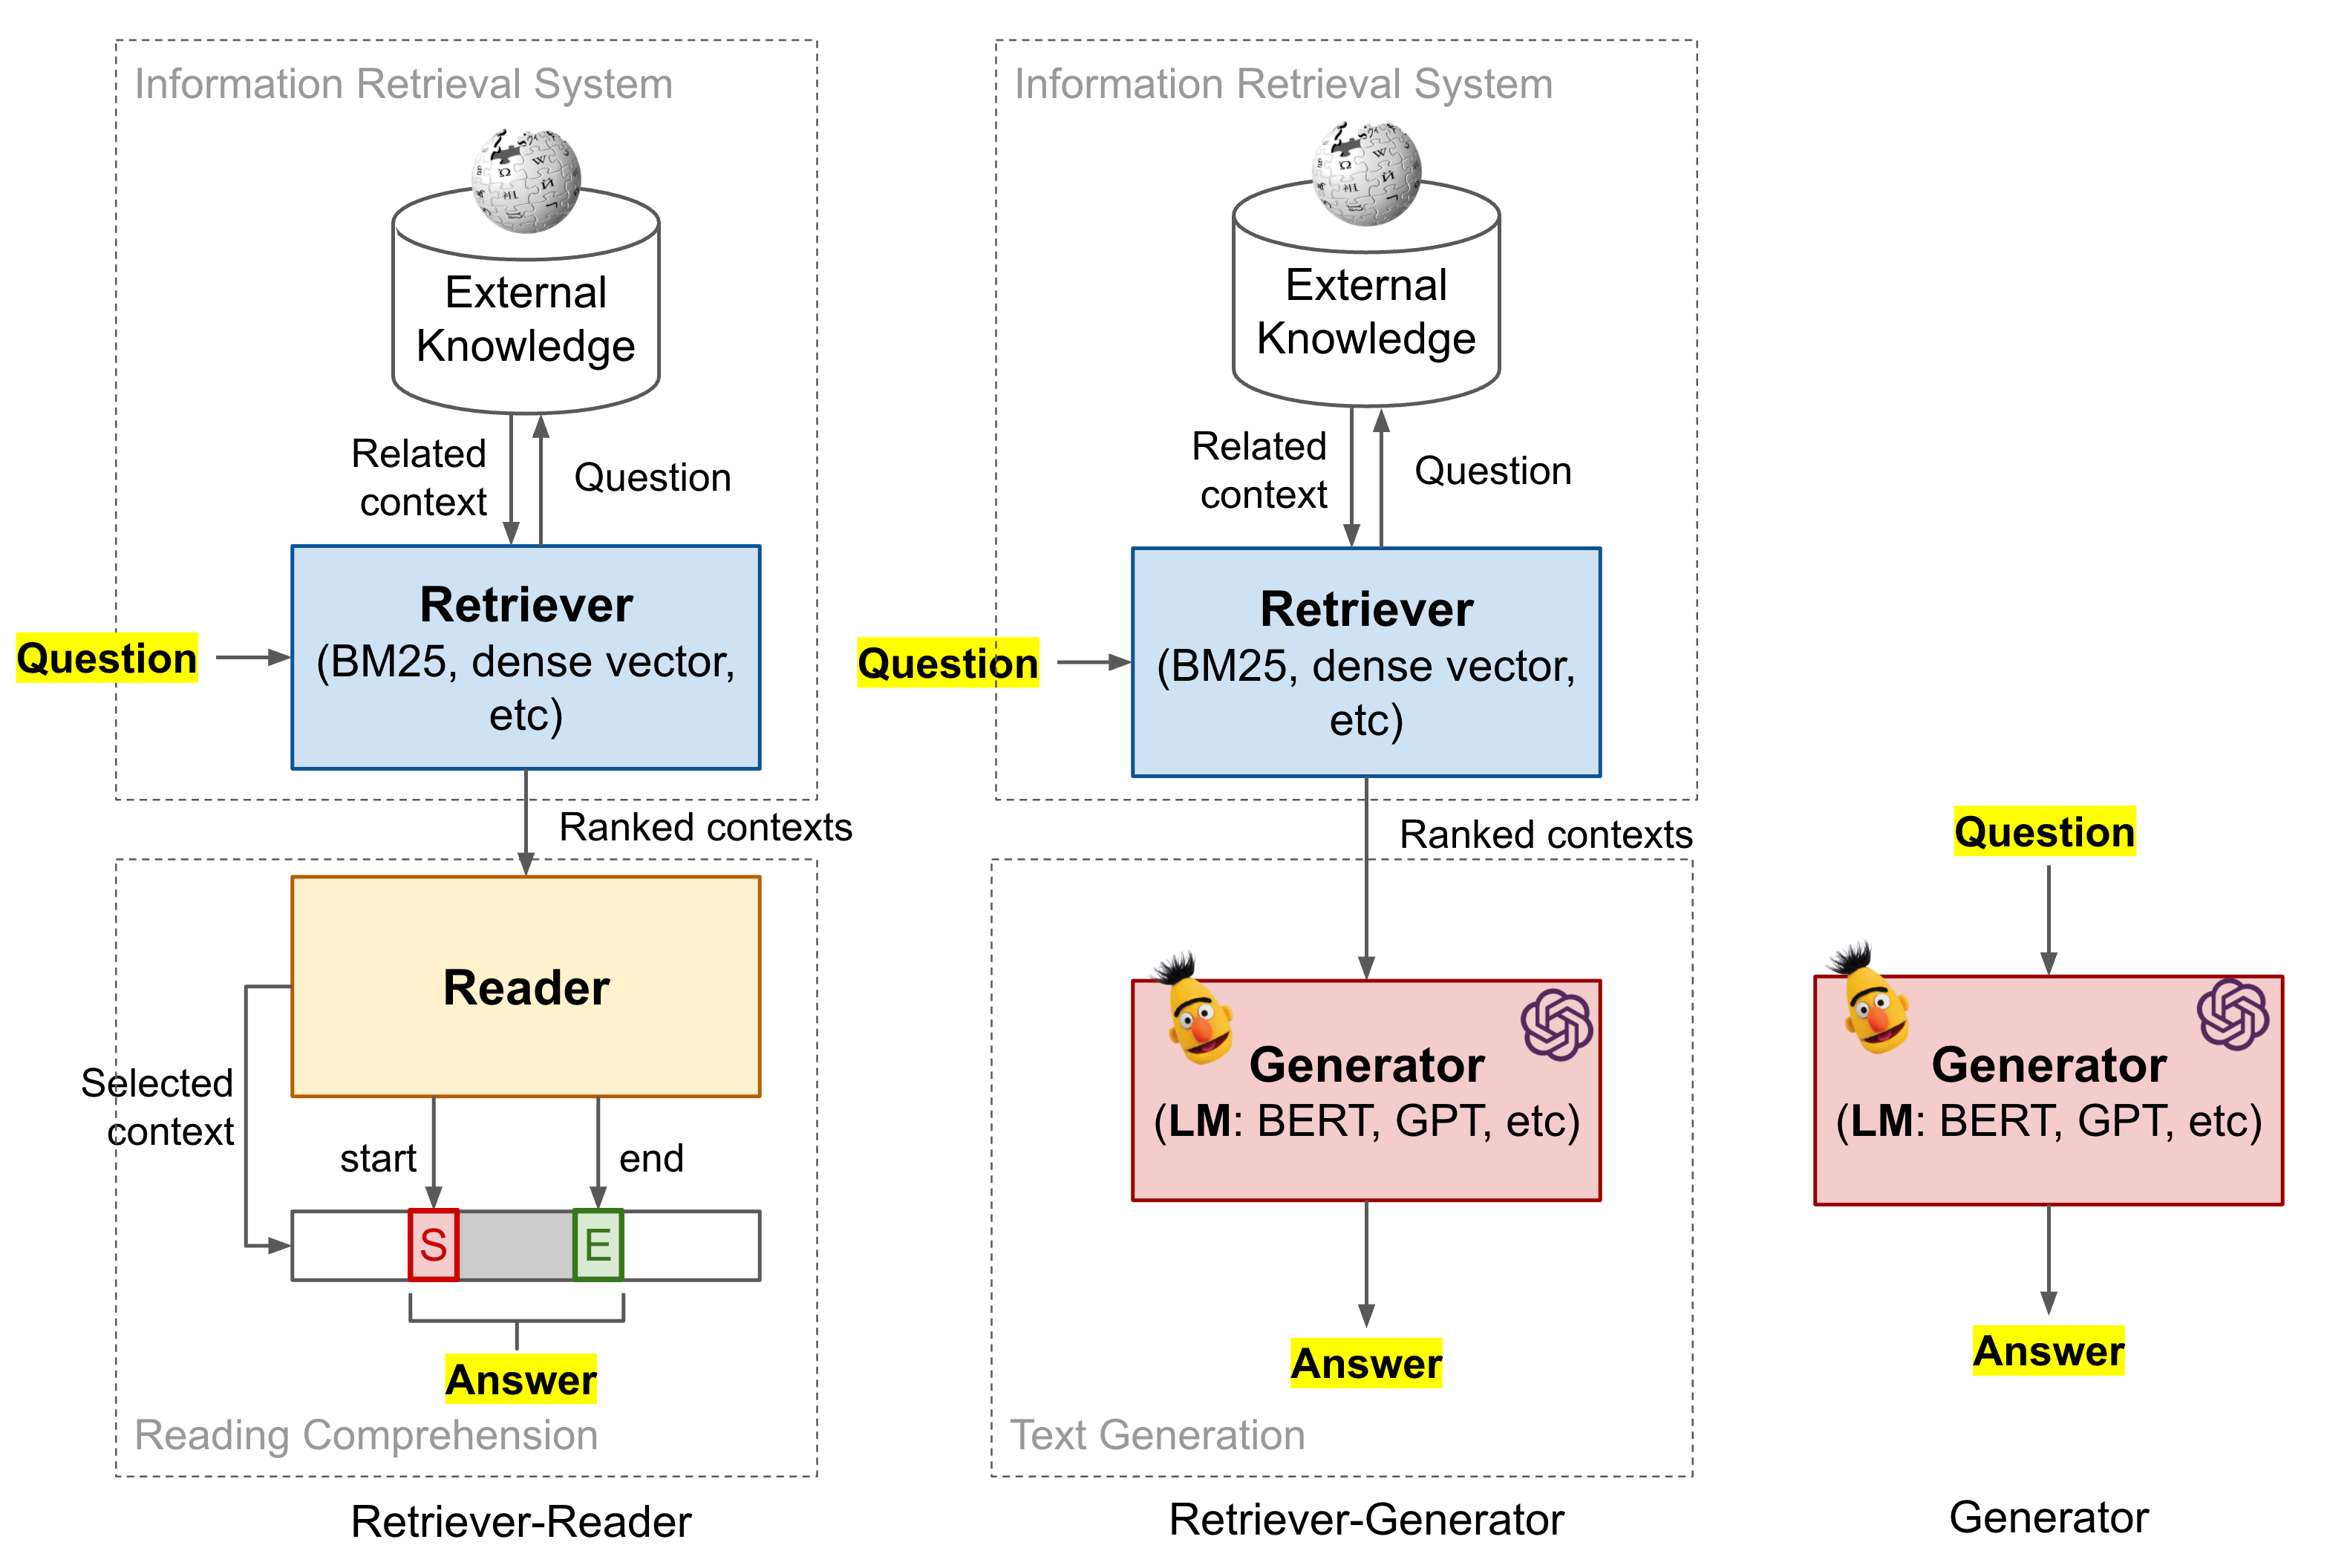

How are Question Answering systems trained?

BERT is a well-recognized language model which can be used for question answering (OPQA, Open book). It is available in the Hugging Face library. It is trained on two objectives: Masked Language Modelling and Next Sentence Prediction.

The most popular datasets for Question Answering are the following:

   1. SquAD Stanford Question Answering Dataset
   2. WebQuestions which contains 3778 training and 2032 testing questions, answer pairs. Questions were obtained by mining a search engine, and answers are Freebase entities annotated by crowd workers. The ODQA task consists of predicting the name of the freebase entity.
   3. TriviaQA is a dataset of ~79k train, ~9k development and ~11k test questions, answer pairs obtained by scraping trivia websites. Answers consist of Wikipedia entities, and any alias for the answer entity is considered a correct answer.
   4. Open Natural Questions consists of search engine questions with answers annotated as spans in Wikipedia articles by crowd workers. Usually, the answer has less than 6 tokens (words).


**The Objective of this content is to display the Transformers usability and Pipeline importance for Question and Answering**

Transformers is a library of pretrained state-of-the-art models for natural language processing (NLP), computer vision, and audio and speech processing tasks. Not only does the library contain Transformer models, but it also has non-Transformer models like modern convolutional networks for computer vision tasks. If you look at some of the most popular consumer products today, like smartphones, apps, and televisions, odds are that some kind of deep learning technology is behind it

# About Table Question Answering

**Use Cases**
SQL execution

You can use the Table Question Answering models to simulate SQL execution by inputting a table.

**Table Question Answering**

Table Question Answering models are capable of answering questions based on a table.

**Install Transformers**

In [1]:
!pip install transformers

**Use Case: Sentiment Analysis**

In [2]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [3]:
ministory="A child is standing on a street corner when a little brown dog approaches. They have a friendly exchange, but it quickly turns rough with the child hitting the dog. The boy loses interest in the dog and heads for home. He notices the dog following. The boy beats the dog with a stick. Despite the mistreatment, it's eager to stay with the boy."
print(classifier(ministory))

[{'label': 'NEGATIVE', 'score': 0.9908526539802551}]


In [4]:
ministory_1 = "today i woke up early and i saw the sun. its really nice and i enjoyed a lot"
print(classifier(ministory_1))

[{'label': 'POSITIVE', 'score': 0.9998812675476074}]


In [5]:
ministory_2="yesterday I went to movie and the first half movie is scary,horrific and screenplay was bad,but the hero was good and strong"
print(classifier([ministory_2]))
ministory_22=["yesterday I went to movie and the first half movie is scary,horrific,ugly and screenplay was bad","but the hero was good and strong"]
result_2 = classifier(ministory_22)

[{'label': 'POSITIVE', 'score': 0.9992082715034485}]


In [6]:
for result in result_2:
 print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: NEGATIVE, with score: 0.9997
label: POSITIVE, with score: 0.9999


**Use Case:**

Given below the paragraph as context and ask the questions. The Model will respond as answer based on the question

We are using the pipeline identifier as "question-answering"

In [7]:
qa_model = pipeline("question-answering")
q_live = "Where do I live?"
q_company = "Which company I Worked?"
q_role = "What kind of role?"
q_hobbies = " what are hobbies?"
context = "HI! My name is Vijay and I live in Hyderabad. I am working for Company Global Logic.My role is Solution Architect.My hobbies are traveling,Visiting Divine Places"

print(qa_model(question = q_live, context = context))
print(qa_model(question = q_company, context = context))
print(qa_model(question = q_role, context = context))
print(qa_model(question = q_hobbies, context = context))

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9873039126396179, 'start': 35, 'end': 44, 'answer': 'Hyderabad'}
{'score': 0.5023557543754578, 'start': 71, 'end': 83, 'answer': 'Global Logic'}
{'score': 0.9810330867767334, 'start': 95, 'end': 113, 'answer': 'Solution Architect'}
{'score': 0.9134868383407593, 'start': 129, 'end': 161, 'answer': 'traveling,Visiting Divine Places'}


**Import Libraries**

In [8]:
from transformers import pipeline
import pandas as pd

# prepare table + question
data = {"Actors": ["Brad Pitt", "Leonardo Di Caprio", "George Clooney"], "Number of movies": ["87", "53", "69"]}
table = pd.DataFrame.from_dict(data)
question = "how many movies does Leonardo Di Caprio have?"

# pipeline model
# Note: you must to install torch-scatter first.
tqa = pipeline(task="table-question-answering", model="google/tapas-large-finetuned-wtq")

# result

print(tqa(table=table, query=question)['cells'][0])

print(table)

53
               Actors Number of movies
0           Brad Pitt               87
1  Leonardo Di Caprio               53
2      George Clooney               69


**Language Tranlation**

In [9]:
text = "translate English to China: India is growing fourth largest economy in the world."

translator = pipeline(task="translation", model="t5-small")

translator(text)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/__init__.py:967: UserWarning: "translation" task was used, instead of "translation_XX_to_YY", defaulting to "translation_en_to_de"
  warnings.warn(


[{'translation_text': 'übersetzen: Indien wächst viertgrößte Wirtschaft der Welt.'}]